# Project: Image Classification and Regression

**Copy code provided**

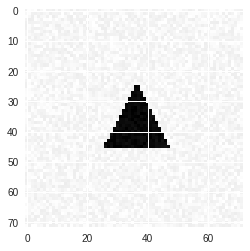

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from keras.utils import np_utils

# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)


def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]


im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

im = generate_a_disk(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')


def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i, end=" ")
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i, end=" ")
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]

##  Simple Classification


**Generate Dataset**

In [0]:
[X_train, Y_train] = generate_dataset_classification(300, 20)

Creating data:
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 

**Build Model and Train**

In [0]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical

# Build model
input_dim = len(X_train[0])
model = Sequential()
model.add(Dense(input_dim=input_dim, units=3, activation='softmax'))

# define optimizer and metric
sgd = SGD(lr= 1e-3)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy']) 

# Train
y = to_categorical(Y_train, 3)
history = model.fit(X_train, y,  batch_size=32, epochs=400, verbose=0)

print("Final loss: ", history.history['loss'][-1])

Final loss:  0.06270231212178866


**Plot training**

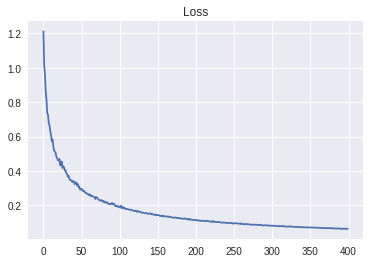

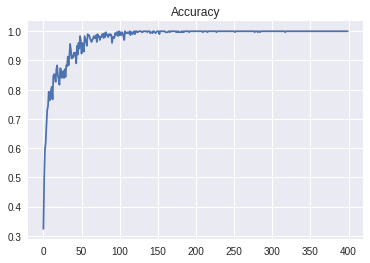

In [0]:
# plot training
plt.plot(history.history['loss'])
plt.title('Loss')
plt.figure()
plt.plot(history.history['acc'])
plt.title('Accuracy')
plt.show()

**Check classifier**

In [0]:
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])

print("disk:", model.predict(X_test))

X_test =  generate_a_triangle()[0]
X_test = X_test.reshape(1, X_test.shape[0])

print("triangle", model.predict(X_test))

disk: [[0. 1. 0.]]
triangle [[0. 0. 1.]]


The classifier works well.

**Same thing but with the Adam optimizer**

Final loss:  0.00850866614530484


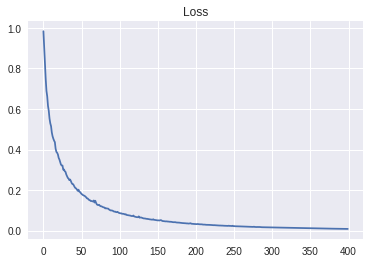

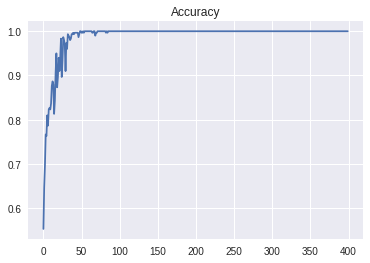

disk: [[0. 1. 0.]]
triangle [[0. 0. 1.]]


In [0]:
from keras.optimizers import Adam

# Build model
input_dim = len(X_train[0])
model = Sequential()
model.add(Dense(input_dim=input_dim, units=3, activation='softmax'))

# define optimizer and metric
adam = Adam(lr = 1e-4)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy']) 

# Train
y = to_categorical(Y_train, 3)
history = model.fit(X_train, y,  batch_size=32, epochs=400, verbose=0)

print("Final loss: ", history.history['loss'][-1])

#plot training
plt.plot(history.history['loss'])
plt.title('Loss')
plt.figure()
plt.plot(history.history['acc'])
plt.title('Accuracy')
plt.show()

#check classifier
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
print("disk:", model.predict(X_test))
X_test =  generate_a_triangle()[0]
X_test = X_test.reshape(1, X_test.shape[0])
print("triangle", model.predict(X_test))

The classifier works well.

## Visualization of the Solution

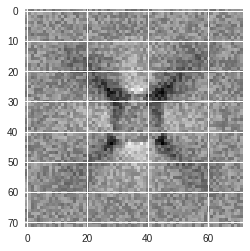

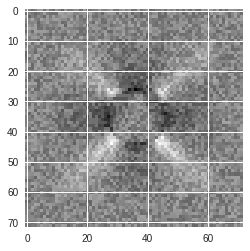

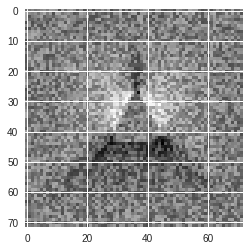

In [0]:
M = model.get_weights()[0]

C1 = M[:,0:1]
plt.imshow(C1.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
C2 = M[:,1:2]
plt.figure()
plt.imshow(C2.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
C3 = M[:,2:3]
plt.figure()
plt.imshow(C3.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')


We can see that the classifier has learned the 3 different shapes to classify them.

##  A More Difficult Classification Problem

**Generate more difficult Dataset**

In [0]:
[X_train, Y_train] = generate_dataset_classification(300, 20, True)

Creating data:
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 

**Retrain the linear classifier on this new training set and check result**

Final loss:  0.09740737279256186


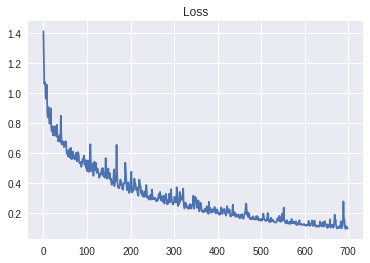

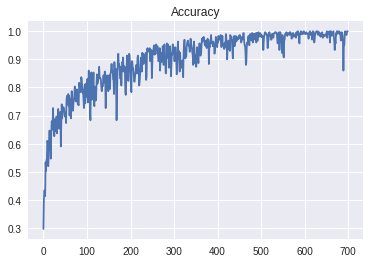

disk: [[1. 0. 0.]]
triangle [[0. 0. 1.]]


In [0]:
# Build model
input_dim = len(X_train[0])
model = Sequential()
model.add(Dense(input_dim=input_dim, units=3, activation='softmax'))

# define optimizer and metric
adam = Adam(lr = 5e-4)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy']) 

# Train
y = to_categorical(Y_train, 3)
history = model.fit(X_train, y,  batch_size=32, epochs=700, verbose=0)

print("Final loss: ", history.history['loss'][-1])

#plot training
plt.plot(history.history['loss'])
plt.title('Loss')
plt.figure()
plt.plot(history.history['acc'])
plt.title('Accuracy')
plt.show()

#check classifier
X_test = generate_a_disk()
X_test = X_test.reshape(1, X_test.shape[0])
print("disk:", model.predict(X_test))
X_test =  generate_a_triangle()[0]
X_test = X_test.reshape(1, X_test.shape[0])
print("triangle", model.predict(X_test))

It doesn't work well with this more difficult dataset, the network is too simple to be able to handle this more difficult problem. We can see that the prediction of the disk is wrong: the network predicted a rectangle instead of a disk.

**Increase the number of training sample**

In [0]:
[X_train, Y_train] = generate_dataset_classification(2000, 20, True)

Creating data:
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 710 720 730 740 750 760 770 780 790 800 810 820 830 840 850 860 870 880 890 900 910 920 930 940 950 960 970 980 990 1000 1010 1020 1030 1040 1050 1060 1070 1080 1090 1100 1110 1120 1130 1140 1150 1160 1170 1180 1190 1200 1210 1220 1230 1240 1250 1260 1270 1280 1290 1300 1310 1320 1330 1340 1350 1360 1370 1380 1390 1400 1410 1420 1430 1440 1450 1460 1470 1480 1490 1500 1510 1520 1530 1540 1550 1560 1570 1580 1590 1600 1610 1620 1630 1640 1650 1660 1670 1680 1690 1700 1710 1720 1730 1740 1750 1760 1770 1780 1790 1800 1810 1820 1830 1840 1850 1860 1870 1880 1890 1900 1910 1920 1930 1940 1950 1960 1970 1980 1990 

**Build and Train a convolutional (not-to-)deep network on this new dataset**

Final loss:  0.05104594892263412


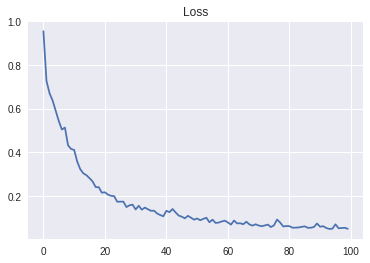

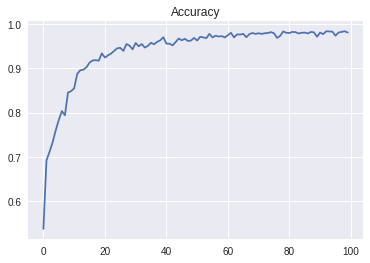

In [0]:
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Flatten
from keras.layers import Dropout


#need to reshape data to have 2D data
X_train2 = []
for i in range(len(X_train)):
    X_train2.append(X_train[i].reshape(IMAGE_SIZE,IMAGE_SIZE,1))
X_train2 = np.array(X_train2)

# Build model
model = Sequential()
model.add(Conv2D(16, (5, 5), activation='relu',input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1))) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.8))
model.add(Dense(3, activation='softmax'))

#define optimizer
adam = Adam(lr = 1e-3)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy']) 

# Train
y = to_categorical(Y_train, 3)
history = model.fit(X_train2, y,  batch_size=32, epochs=100, verbose=0)

print("Final loss: ", history.history['loss'][-1])

#plot training
plt.plot(history.history['loss'])
plt.title('Loss')
plt.figure()
plt.plot(history.history['acc'])
plt.title('Accuracy')
plt.show()

**Generate Test set**

In [0]:
[X_test, Y_test] = generate_test_set_classification()

Creating data:
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 

**Evaluate the classifier on this test set**

In [0]:
#need to reshape data to have 2D data
X_test2 = []
for i in range(len(X_test)):
    X_test2.append(X_test[i].reshape(IMAGE_SIZE,IMAGE_SIZE,1))
X_test2 = np.array(X_test2)

#evaluate the model on test set
model.evaluate(X_test2, Y_test)

300/300 [==============================] - 5s 17ms/step


[0.1700075711806615, 0.9299999992052714]

We have a loss of 0.16 and an accuracy of 0.92 on the test set with this deep network, much better than with the previous linear classifier. We can see that we have overfitting. I have not managed to reduce it more. I tried a dropout with a very high parameter (0.8).

**Check prediction**

prediction: [[0.00432166 0.98433405 0.01134428]]


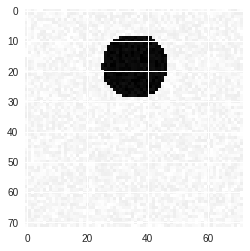

In [0]:
plt.imshow(X_test2[0].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

#check classifier
print("prediction:", model.predict(np.array([X_test2[0]])))

We can see that the classifier works well (we have most of the weight on the second coordinate). However, it's less accurate than in the previous easier dataset.

##  A Regression Problem

**Generate Training Set**

In [0]:
[X_train, Y_train] = generate_dataset_regression(2000, 20)

Creating data:
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 710 720 730 740 750 760 770 780 790 800 810 820 830 840 850 860 870 880 890 900 910 920 930 940 950 960 970 980 990 1000 1010 1020 1030 1040 1050 1060 1070 1080 1090 1100 1110 1120 1130 1140 1150 1160 1170 1180 1190 1200 1210 1220 1230 1240 1250 1260 1270 1280 1290 1300 1310 1320 1330 1340 1350 1360 1370 1380 1390 1400 1410 1420 1430 1440 1450 1460 1470 1480 1490 1500 1510 1520 1530 1540 1550 1560 1570 1580 1590 1600 1610 1620 1630 1640 1650 1660 1670 1680 1690 1700 1710 1720 1730 1740 1750 1760 1770 1780 1790 1800 1810 1820 1830 1840 1850 1860 1870 1880 1890 1900 1910 1920 1930 1940 1950 1960 1970 1980 1990 

**Pre-process data (sort the vertices to put them in the same order)**

In [0]:
def sort_vertices(y):
    y_new = []
    X = [y[0], y[2], y[4]]
    x_max = np.argmax(X)
    y_new = y_new + list(y[x_max*2: x_max*2 + 2])
    X[x_max] = -1
    x_max = np.argmax(X)
    y_new = y_new + list(y[x_max*2: x_max*2 + 2])
    X[x_max] = -1
    x_max = np.argmax(X)
    y_new = y_new + list(y[x_max*2: x_max*2 + 2])
    return y_new

def preprocess(X, Y):
    
    #need to reshape data to have 2D data
    X_2 = []
    for i in range(len(X)):
        X_2.append(X[i].reshape(IMAGE_SIZE,IMAGE_SIZE,1))
    X_2 = np.array(X_2)

    #sort the vertices from the right to the left
    Y_sort = []
    for y in Y:
        Y_sort.append(sort_vertices(y))
    Y_sort = np.array(Y_sort)
    
    return X_2, Y_sort

**Build, train regressor model and check result**

Final loss:  0.004686515808105468


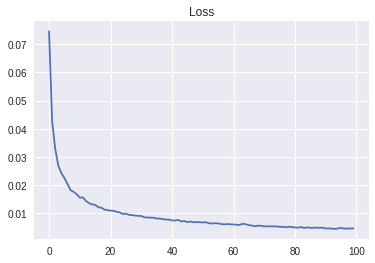

In [0]:
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Flatten
from keras.models import Sequential 
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout

# preprocess data
X_train_2, Y_sort = preprocess(X_train, Y_train)

# Build model
model = Sequential()
model.add(Conv2D(16, (5, 5), activation='relu',input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1))) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(128))
model.add(Dropout(0.4))
model.add(Dense(6))

#define optimizer
adam = Adam(lr = 6e-4)
model.compile(loss='mse', optimizer=adam) 

# Train
history = model.fit(X_train_2, Y_sort,  batch_size=32, epochs=100, verbose=0)

print("Final loss: ", history.history['loss'][-1])

#plot training
plt.plot(history.history['loss'])
plt.title('Loss')
plt.show()

**Evaluate the solution on a generated test set**

In [0]:
#generate test set
[X_test, Y_test] = generate_test_set_regression()

# preprocess data
X_test_2, Y_test_sort = preprocess(X_test, Y_test)

#evaluate model on test set
model.evaluate(X_test_2, Y_test_sort)

Creating data:
300/300 [==============================] - 0s 177us/step


0.004997869779666265

We have a good loss (low loss) on the test set (and no overfitting). Let's check visually the result.

**Check visually the prediction on the test set**

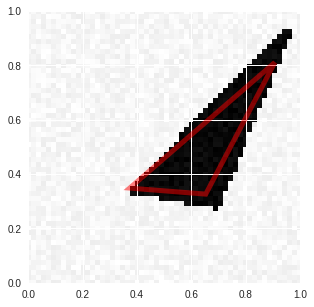

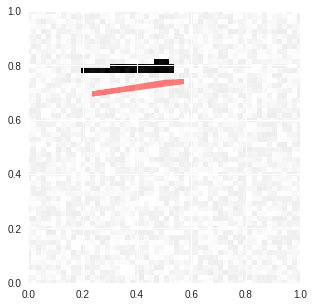

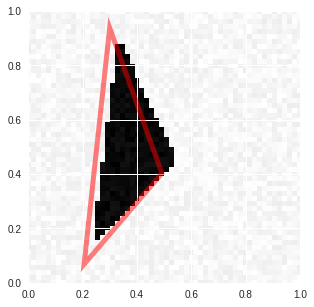

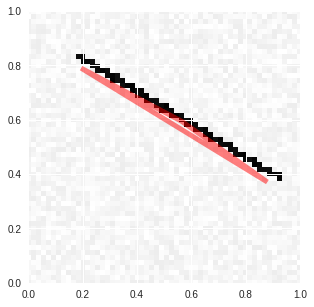

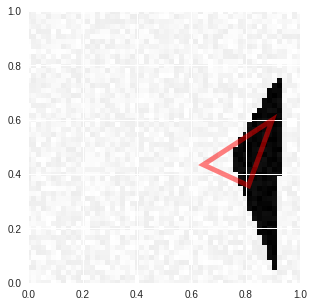

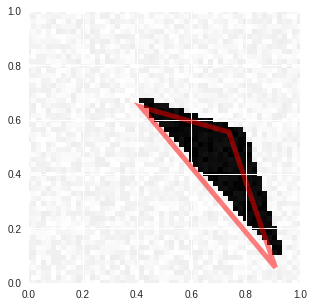

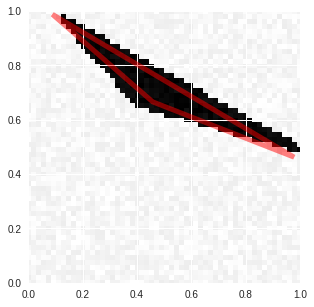

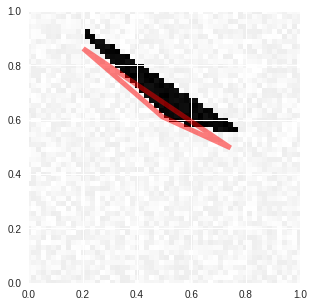

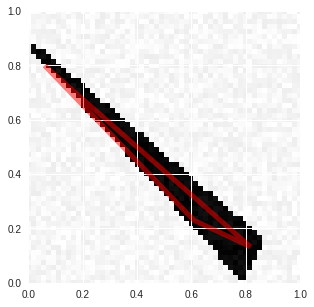

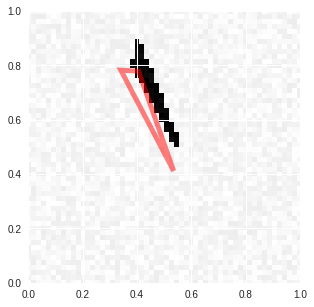

In [0]:
for i in range(10):
    visualize_prediction(X_test_2[i], model.predict(X_test_2[i:i+1]))
    #visualize_prediction(X_test_2[i], Y_test_sort[i])

Visually, it's is not bad result. We can also increase the dataset to have better result or try to find a better architecture for the network.

## Image Denoising

** Modifying the provided code to generate
pairs of images, where one image has noise with random amplitude, and the second image has the
same content but without the noise.**

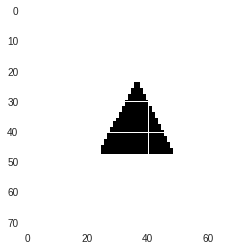

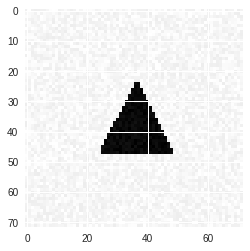

In [0]:
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    noise = np.random.choice([20,25,30,35,40]) #choose a random amplitude among those
    imdata_noise = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    
    return imdata_noise, imdata, noise

def generate_a_rectangle(free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V)


def generate_a_disk(free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V)

def generate_a_triangle(free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3)
        V = np.random.random(3)
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    
    return generate_a_drawing(figsize, U, V)

im_noise, im, noise = generate_a_rectangle( True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

im_noise, im, noise = generate_a_disk()
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

im_noise, im, noise = generate_a_triangle(False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

plt.figure()
plt.imshow(im_noise.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')



def generate_dataset_denoising(nb_samples):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    X_noise = np.zeros([nb_samples, im_size])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i, end=" ")
        category = np.random.randint(3)
        if category == 0:
            X_noise[i], X[i], noise = generate_a_rectangle(True)
            X_noise[i] = (X_noise[i] + noise) / (255 + 2 * noise)
            X[i] = (X[i]/255)
        elif category == 1: 
            X_noise[i], X[i], noise = generate_a_disk(True)
            X_noise[i] = (X_noise[i] + noise) / (255 + 2 * noise)
            X[i] = (X[i]/255)
        else:
            X_noise[i], X[i], noise = generate_a_triangle(True)
            X_noise[i] = (X_noise[i] + noise) / (255 + 2 * noise)
            X[i] = (X[i]/255)
    
    return [X_noise, X]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_denoising():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_denoising(300)
    return [X_test, Y_test]

**Generate data set of pairs of noisy/clean image**

In [0]:
X_noisy, X_clean = generate_dataset_denoising(300)

Creating data:
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 

**Preprocess Data**

In [0]:
def preprocess(X):
    
    #need to reshape data to have 2D data
    X_2 = []
    for i in range(len(X)):
        X_2.append(X[i].reshape(IMAGE_SIZE,IMAGE_SIZE,1))
    X_2 = np.array(X_2)

    return X_2

**Define the Hourglass network and Train it**

Final loss:  0.0025443616850922505


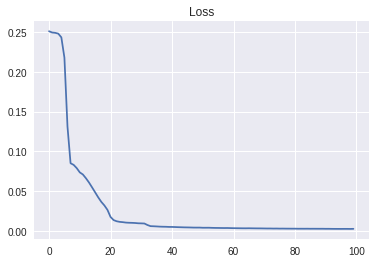

In [0]:
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Flatten
from keras.models import Sequential 
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.layers import UpSampling2D
                               
# preprocess data
X_noisy2 = preprocess(X_noisy)
X_clean2 = preprocess(X_clean)

# Build model
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu')) 
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Dropout(0.5))

model.add(UpSampling2D(size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu')) 
model.add(UpSampling2D(size=(2, 2)))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
          
model.add(Conv2D(2, (3, 3), padding='same', activation='relu')) 
model.add(Conv2D(1, (1, 1), padding='same', activation='sigmoid')) 

#define optimizer
adam = Adam(lr = 1e-4)
model.compile(loss='mse', optimizer=adam)

# Train
history = model.fit(X_noisy2, X_clean2,  batch_size=32, epochs=100, verbose=0)

print("Final loss: ", history.history['loss'][-1])

#plot training
plt.plot(history.history['loss'])
plt.title('Loss')
plt.show()

**Evaluate the result on a test set**

In [0]:
#generate test set
[X_test, Y_test] = generate_test_set_denoising()

# preprocess data
X_noisy = preprocess(X_test)
X_clean = preprocess(Y_test)

#evaluate model on test set
model.evaluate(X_noisy, X_clean)

Creating data:
300/300 [==============================] - 0s 1ms/step


0.0022774105115483203

Good loss and no overfitting.

**Let's check visually the result**

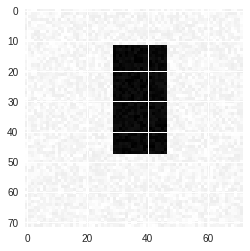

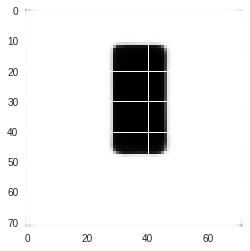

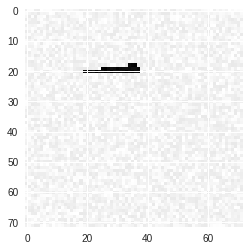

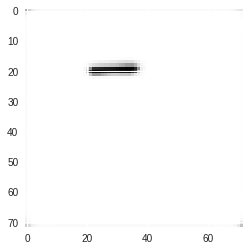

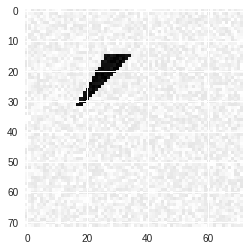

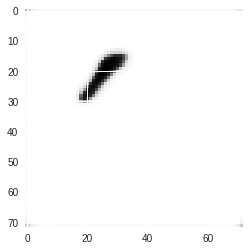

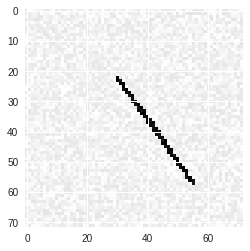

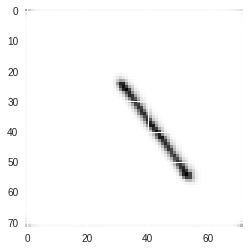

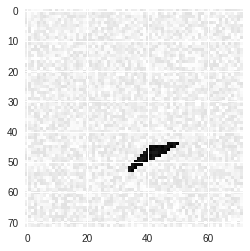

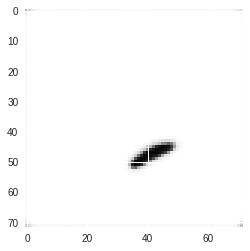

In [0]:
X_predict  = model.predict(np.array(X_noisy[0:5]))

for i in range(5):
  im_noisy = X_noisy[i]
  im = X_predict[i]
  plt.figure()
  plt.imshow(im_noisy.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
  plt.figure()
  plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

We see that we the image are well denoised. However, the shapes are blurred. That because we loose informations about the image when we go down in the network. One way to avoid this is to do skip connections as in the U-network. We will try this below.

**Create U-net and train it**

In [0]:
X_noisy, X_clean = generate_dataset_denoising(2000)

Creating data:
0 10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570 580 590 600 610 620 630 640 650 660 670 680 690 700 710 720 730 740 750 760 770 780 790 800 810 820 830 840 850 860 870 880 890 900 910 920 930 940 950 960 970 980 990 1000 1010 1020 1030 1040 1050 1060 1070 1080 1090 1100 1110 1120 1130 1140 1150 1160 1170 1180 1190 1200 1210 1220 1230 1240 1250 1260 1270 1280 1290 1300 1310 1320 1330 1340 1350 1360 1370 1380 1390 1400 1410 1420 1430 1440 1450 1460 1470 1480 1490 1500 1510 1520 1530 1540 1550 1560 1570 1580 1590 1600 1610 1620 1630 1640 1650 1660 1670 1680 1690 1700 1710 1720 1730 1740 1750 1760 1770 1780 1790 1800 1810 1820 1830 1840 1850 1860 1870 1880 1890 1900 1910 1920 1930 1940 1950 1960 1970 1980 1990 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


Final loss:  2.7779582765674603e-08


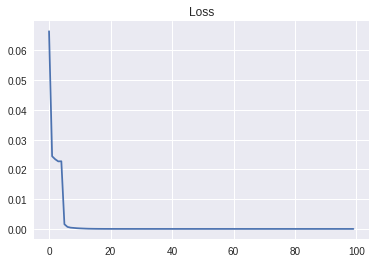

In [0]:
from keras.layers import Conv2D, MaxPooling2D , Input
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.layers import UpSampling2D
from keras.models import Model
from keras.layers import concatenate
# preprocess data
X_noisy2 = preprocess(X_noisy)
X_clean2 = preprocess(X_clean)


# Build model
inputs = Input(shape = (IMAGE_SIZE, IMAGE_SIZE, 1))

conv1a = Conv2D(16, 3, padding='same', activation = 'relu')(inputs)
conv1b = Conv2D(16, 3, padding='same', activation = 'relu')(conv1a)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1b)

conv2a = Conv2D(32, 3, padding='same', activation = 'relu')(pool1)
conv2b = Conv2D(32, 3, padding='same', activation = 'relu')(conv2a)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2b)

conv3a = Conv2D(64, 3, padding='same', activation = 'relu')(pool2)
conv3b = Conv2D(64, 3, padding='same', activation = 'relu')(conv3a)

up4 = UpSampling2D(size = (2,2))(conv3b)
up_conv4 = Conv2D(32, 2, padding='same', activation = 'relu')(up4)
merge4 = concatenate([conv2b, up_conv4], axis=3)
conv4b = Conv2D(32, 3, padding='same', activation = 'relu')(merge4)
conv4c = Conv2D(32, 3, padding='same', activation = 'relu')(conv4b)

up5 = UpSampling2D(size = (2,2))(conv4c)
up_conv5 = Conv2D(16, 2, padding='same', activation = 'relu')(up5)
merge5 = concatenate([conv1b, up_conv5], axis=3)
conv5b = Conv2D(16, 3, padding='same', activation = 'relu')(merge5)
conv5c = Conv2D(16, 3, padding='same', activation = 'relu')(conv5b)

conv6a = Conv2D(2, 3, padding='same', activation='relu')(conv5c)
conv6b = Conv2D(1, 1, padding='same', activation='sigmoid')(conv6a)

model = Model(input = inputs, output = conv6b)

#define optimizer
adam = Adam(lr = 5e-4)
model.compile(optimizer = adam, loss = 'mse')


# Train
history = model.fit(X_noisy2, X_clean2,  batch_size=32, epochs=100, verbose=0)
print("Final loss: ", history.history['loss'][-1])

#plot training
plt.plot(history.history['loss'])
plt.title('Loss')
plt.show()

**Evaluate the result on a test set**

In [0]:
#generate test set
[X_test, Y_test] = generate_test_set_denoising()

# preprocess data
X_noisy = preprocess(X_test)
X_clean = preprocess(Y_test)

#evaluate model on test set
model.evaluate(X_noisy, X_clean)

Creating data:
300/300 [==============================] - 5s 16ms/step


4.172468891283643e-08

We have a good loss and just a very little bit of overfitting.

**Let's check visually the result**

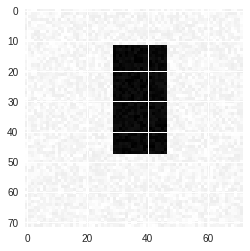

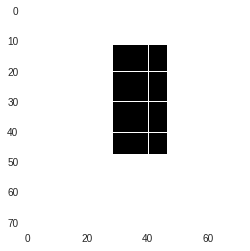

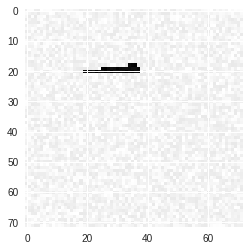

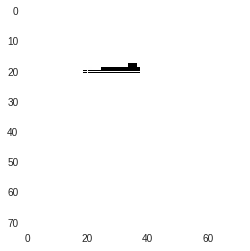

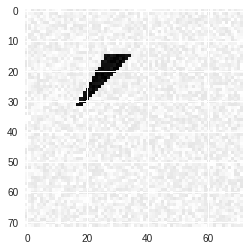

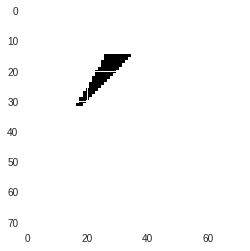

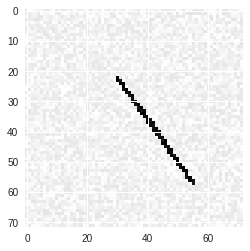

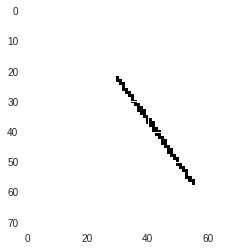

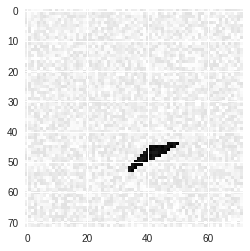

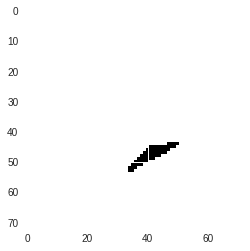

In [0]:
X_predict  = model.predict(np.array(X_noisy[0:5]))

for i in range(5):
  im_noisy = X_noisy[i]
  im = X_predict[i]
  plt.figure()
  plt.imshow(im_noisy.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
  plt.figure()
  plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

We have very good results: good denoising and we do not have anymore an issue with blurred shapes.